# Problem Description
### if you have a resturant or something like that you can analyse the reviews data , clean it , visualize , fit it and create a model .
### Bishoy Shehata Morris -- 20191616066
# Import Packages


In [722]:
# Add environment Packages paths to conda
import os, sys
# env_name = "food_review"
# sys.path.append(f"C:\\Environments\\{env_name}\\lib\\site-packages\\")

import pandas as pd
import numpy as np
# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
from nltk.corpus import stopwords # Stopwords
# nltk.download('punkt')
from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

## Read Dataset

In [723]:
%%time
df = pd.read_csv('Reviews.csv')

Wall time: 3.5 s


In [724]:
f"{df.shape[0]:,} Review"

'568,454 Review'

In [725]:
cols = ['Text', 'Score']
df_text = df[cols].copy()
df_text.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


## Drop Duplicates
#### Save the Cleaned data-frame also with the variable df_text

In [726]:
df_text=df.drop_duplicates()
cols = ['Text', 'Score']
df_text = df[cols].copy()

## Target Variable Pre-Processing
 target will be

    * 0 if score < 3
    * 1 otherwise

In [727]:
df_text['target']=df_text['Score'].apply(lambda x:0 if x < 3 else 1)
df_text['target'].shape

(568454,)

### Plot Countplot for target Variable

<AxesSubplot:xlabel='target', ylabel='count'>

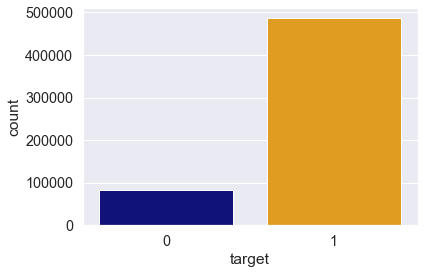

In [728]:
targetplot=df_text['target'].value_counts()[0:2]
sns.countplot(x='target',data=df_text,palette = ['darkblue','orange'])

## Balance Data Target

In [729]:
df_pos=df_text[df_text['target']==1]
NEG_N = df_text.target.value_counts()[0]
X=df_text[cols]
y=df_text['target']

In [730]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
NEG_N, df_pos = under_sampler.fit_resample(X, y)
NEG_N = df_text.target.value_counts()[0]

In [731]:
print(NEG_N,df_pos.shape )

82037 (164074,)


In [732]:
#resample dataset shape
from collections import Counter
print (format(Counter(y)))
print(format(Counter(df_pos)))

Counter({1: 486417, 0: 82037})
Counter({0: 82037, 1: 82037})


In [733]:
# Sample from positive reviews Same number of negative reviews
NEG_N = df_text.target.value_counts()[0]
df_pos = df_text[df_text['target'] == 1]['Text'].sample(NEG_N, replace=False)
df_text_balanced = pd.concat([df_text.iloc[df_pos.index], df_text[df_text.target == 0]])

<AxesSubplot:xlabel='target', ylabel='count'>

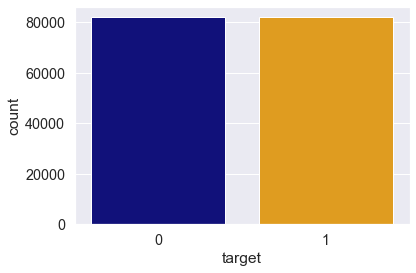

In [734]:
## PLot the target again after balancing
sns.countplot(x='target',data=df_text_balanced,palette = ['darkblue','orange'])

## Text Pre-Processing

In [735]:
def Text_Pre_Processing(x):
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer("english")
    porter = PorterStemmer()
    lancaster=LancasterStemmer()
    x = df['Text'].str.lower()
    for word in x :
        if word in stop_words:
            x.remove(word)
#         if you want to print
# for word in x:
#     print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))
    lemmatizer= WordNetLemmatizer()
    for word in x :
        if word in stop_words:
            x.remove(word)
        #         if you want to print
# for word in x:
#     print ("{0:20}{1:20}".format(word,lemmatizer.lemmatize(word)))

    return

### Split Test & Training Data

### Text Embedding
    Use TfidfVectorizer
    fit on the training data only
    transform on training and test

In [736]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [737]:
## TFIDF embedding for the Description

def TfidfVectorizer(vectorizer_tfidf):
    vectorizer = TfidfVectorizer()
    vectorizer_tfidf=vectorizer.fit(X)

    X_train=vectorizer_tfidf.fit_transform(X_train)
    X_test=vectorizer.transform(X_test)

In [738]:
# See the dimensions of your data embeddings before entering to the model
X_train.shape, X_test.shape

((380864, 2), (187590, 2))

### Modelling

In [739]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Sklearn framework steps
    init
    fit
    predic

In [740]:
## initialize your Model
clf=RandomForestClassifier(n_jobs=4)
# Fit your Model on the Training Dataset
X_test, y_test = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=2)
# define model
model = LogisticRegression(solver='lbfgs')
# fit model
model.fit(X_test, y_test)
# make predictions
preds = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 100.0%


### Raw Instance Prediction

In [741]:
# def raw_test(review, model, vectorizer):
#     # Clean Review
#     review_c = review
#     Text_Pre_Processing(review_c)
#     # Embed review using tf-idf vectorizer
#     embedding = TfidfVectorizer(review_c)
#     # Predict using your model
#     prediction = model(embedding)
#     print(prediction)
#     # Return the Sentiment Prediction
#     return "Positive" if prediction < 100.0  else "Negative"


In [742]:
# review_1 = "That's a good Dish, Good Job"
# review_2 = "That's the worst Dish ever tasted"

In [743]:
# raw_test(review_1, clf, vectorizer_tfidf)

In [644]:
# raw_test(review_2, clf, vectorizer_tfidf)